[Saved] phi_remaining_vs_h.png and phi_remaining_vs_h.pdf


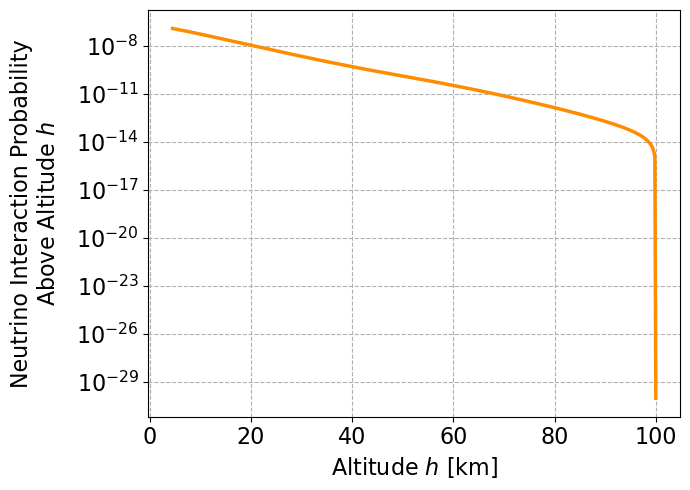

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# === Neutrino interaction PDF ===
def hiePDF(h_cm, theta_rad, E_GeV):
    h2 = 100e5   # cm
    Re = 6371.004e5  # cm
    A = 28.9634  # 空气平均原子质量
    Na = 6.022e23  # 阿伏伽德罗常数

    eps = (Na / A) * (5.53e-36) * E_GeV**0.363

    # 路径长度
    cos_theta = np.cos(theta_rad)
    sin_theta = np.sin(theta_rad)

    L2 = (np.sqrt(cos_theta**2 + 2 * sin_theta**2 * h2 / Re) - cos_theta) * Re / (sin_theta**2)
    L = (np.sqrt(cos_theta**2 + 2 * sin_theta**2 * h_cm / Re) - cos_theta) * Re / (sin_theta**2)
    L = L2 - L

    # 大气密度模型
    h_km = h_cm / 1e5
    if 0 < h_cm < 11e5:
        T = 288.15 - h_km * 6.5
        P = 1013.25 * (288.15 / T)**(-5.256)
    elif 11e5 <= h_cm < 20e5:
        T = 216.65
        P = 226.31 * np.exp(1.73 - 0.1577 * h_km)
    elif 20e5 <= h_cm < 32e5:
        T = 196.65 + h_km
        P = 54.48 * (216.65 / T)**34.163
    elif 32e5 <= h_cm < 47e5:
        T = 139.05 + 2.8 * h_km
        P = 8.637 * (228.65 / T)**12.2
    elif 47e5 <= h_cm < 51e5:
        T = 270.65
        P = 1.10 * np.exp(5.91 - 0.1265 * h_km)
    elif 51e5 <= h_cm < 71e5:
        T = 413.45 - 2.8 * h_km
        P = 0.64 * (270.65 / T)**(-12.2)
    else:
        T = 356.65 - 2.0 * h_km
        P = 0.038 * (214.65 / T)**(-17.0815)

    P *= 100  # hPa → Pa
    rho = P / (286.9 * T)  # g/m³
    rho *= 1e-3  # g/cm³

    l_h = Re / np.sqrt(Re**2 * cos_theta**2 + 2 * Re * sin_theta**2 * h_cm)
    PHF = np.exp(-eps * rho * L) * eps * rho * l_h
    return PHF

def plot_reverse_cumulative_interaction(theta_deg=80, E_GeV=1e7, hmin_km=4.5, hmax_km=100.0, savefig=True):
    theta_rad = np.deg2rad(theta_deg)
    N = 500
    h_vals_km = np.linspace(hmin_km, hmax_km, N)
    h_vals_cm = h_vals_km * 1e5
    P_vals = []

    for h_cm in h_vals_cm:
        result, _ = quad(lambda h: hiePDF(h, theta_rad, E_GeV), h_cm, h_vals_cm[-1], epsabs=1e-10)
        P_vals.append(result if result > 0 else 1e-30)

    # === Plot ===
    plt.figure(figsize=(7, 5))
    plt.plot(h_vals_km, P_vals, color='darkorange', linewidth=2.5)
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--')
    plt.xlabel("Altitude $h$ [km]", fontsize=16)
    plt.ylabel("Neutrino Interaction Probability\nAbove Altitude $h$", fontsize=16, labelpad=12)
    plt.tick_params(axis='both', labelsize=16)
    plt.tight_layout()

    if savefig:
        plt.savefig("phi_remaining_vs_h.png", dpi=600)
        plt.savefig("phi_remaining_vs_h.pdf", dpi=600)
        plt.savefig("phi_remaining_vs_h.eps", dpi=600)
        print("[Saved] phi_remaining_vs_h.png and phi_remaining_vs_h.pdf")

    plt.show()
# 调用绘图函数
plot_reverse_cumulative_interaction()

